# Multi-agent Scenario

In [1]:
from env_multiagent import setup
setup()

In this notebook, we synthesize policy for multiple agents whose objective is to collectively explore a given set of targets, i.e., each target state should be visited by at least one agent. We consider the an environment with ten targets, two reload states, and three agents (shown below) to demonstrate our work in this notebook. Further, we assume that all the agents start at the same state, the base of the agents, and are required to get back to the base by the end of the mission. The following figure shows the environment with base, targets and reload states. 

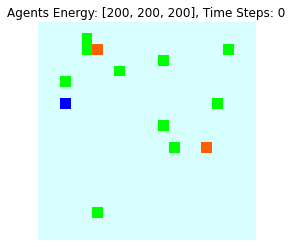

In [2]:
# create environment
from env_multiagent import create_env
agents_capacities = [200,200,200]
e = create_env(agents_capacities)
e.create_consmdp()
e

Figure showing the target states, reload states, and base.
* <font color='green'>Green Cells</font>: Target States
* <font color='orange'>Orange Cells</font>: Reload states
* <font color='blue'>Blue Cell</font>: Base or Home (initial and final state of all agents)

In order to cover all targets in the shortest period of time, and under the assumption that the agents do not communicate, we allocate different targets to different agents at the beginning of the mission. Given a set of targets and initial state of the agents, our algorithm for target allocation estimates the expected cover time (time required to visit a set of states) for all possible subsets of the target set using a sub-optimal value iteration procedure and identifies the optimal allocation. Once we obtain the targets allocated for different agents, we proceed to generate safe policies to cover the target states. 


Recall that in this notebook, we consider environment with three agents. The following figure shows the outcome of our target allocation algorithm. Each shade of grey represents one of the agent and the target states with that color represent the subset of targets allocated to that particular agent. 

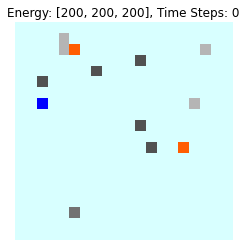

In [3]:
from env_multiagent import visualize_allocation
visualize_allocation(e)

Figure showing output of optimal target allocation algorithm.
* **Medium Grey**: First Agent
* **Light Grey**: Second Agent
* **Dark Grey**: Third Agent

As we can see in the above figure, the first agent (medium intensity shade of grey) is allocated only one target (at the bottom), the second agent (light grey) is allocated four targets and finally the third agent (dark grey) is allocated five agents. We now generate safe policies for each agent to cover its target set. A simulation of trajectories using the obtained using the generated policies is shown below.

In [5]:
# Simulate trajectories
from env_multiagent import animate_multipletargets
animate_multipletargets(e, capacities_list=agents_capacities, num_steps=20, interval=100)

Animation showing the trajectory of the three agents covering their respective target sets.